In [3]:
root = 'E:/datamining/datasets/'

with open(f'{root}README.txt', 'r') as fp:
    R = fp.read()
    
print(R)

iris.txt -- 4 dimensions + class labels


iris-slw.dat -- Iris 2D data: sepal length and sepal width


categorial-3way.dat -- discretized 3-way data for chap3
			sepal length, sepal width, class


iris-layout.txt -- Iris graph from chap4
	each edge is denoted as
		"e" xi xj w(xi, xj) 
	each vertex is denoted as
		"v" vi x-pos y-pos class


hprd.txt -- human protein interaction network for chap4, example 4.9
	each line has an edge 
		vi vj


iris-slwpl.dat -- Iris 3D data for chap7
		sepal length, sepal width, petal length


iris-2d-nonlinear.dat -- Non-linear 2D Iris data for chap7, example 7.7
	

iris-conv.txt -- discretized 4D + class Iris dataset for chap12,
	first used in example 12.9.


iris-PC.txt -- Iris 2D Principal Components dataset, 
		first used in chap13, example 13.2


kerneldata.txt -- dataset for kernel kmeans, chap12, example 13.3


t7-4k.txt -- density-based dataset for chap15, 
		first used in figure 15.1
		ignore the last dimension


iris-clusters-normalized.txt -- 

In [1]:
import os
import pandas as pd
import numpy as np

In [4]:
os.listdir(root)

['categorial-3way.dat',
 'hprd.txt',
 'iris-2d-nonlinear.dat',
 'iris-clusters-normalized.txt',
 'iris-conv.txt',
 'iris-layout.txt',
 'iris-PC-versicolor.txt',
 'iris-PC-virginica.txt',
 'iris-PC.txt',
 'iris-slw.dat',
 'iris-slwc.txt',
 'iris-slwpl.dat',
 'iris.txt',
 'kerneldata.txt',
 'ldata.txt',
 'README.txt',
 't7-4k.txt']

# `iris.txt`

## NumPy 读取数据

参考：[在 Pandas 中更改列的数据类型](https://www.cnblogs.com/q735613050/p/9130312.html)

In [5]:
with open(f'{root}iris.txt') as fp:
    iris_ = fp.read()

iris_ = np.array([fea.replace('"', '').split(',') for fea in iris_.splitlines()])
#iris = pd.DataFrame(iris)

df = pd.DataFrame(iris_, columns=['萼片长度', '萼片宽度', '花瓣长度', '花瓣宽度', '鸢尾花类型'])

iris = df.iloc[:,:3].astype('float')

iris['鸢尾花类型'] = df['鸢尾花类型']

In [6]:
iris.dtypes

萼片长度     float64
萼片宽度     float64
花瓣长度     float64
鸢尾花类型     object
dtype: object

## Pandas 直接读取数据

In [7]:
iris = pd.read_table(f'{root}iris.txt', sep=',', header=None, names=['萼片长度', '萼片宽度', '花瓣长度', '花瓣宽度', '鸢尾花类型'])
iris.dtypes

萼片长度     float64
萼片宽度     float64
花瓣长度     float64
花瓣宽度     float64
鸢尾花类型     object
dtype: object

In [8]:
iris.head()

,萼片长度,萼片宽度,花瓣长度,花瓣宽度,鸢尾花类型
0,5.9,3.0,4.2,1.5,Iris-versicolor
1,6.9,3.1,4.9,1.5,Iris-versicolor
2,6.6,2.9,4.6,1.3,Iris-versicolor
3,4.6,3.2,1.4,0.2,Iris-setosa
4,6.0,2.2,4.0,1.0,Iris-versicolor


## 可视化

In [9]:
from pylab import plt, mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号 '-' 显示为方块的问题

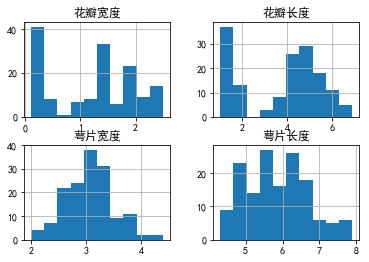

In [25]:
iris.hist()
plt.show()

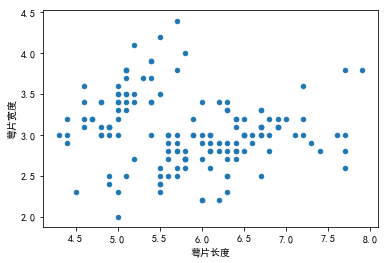

In [24]:
iris.plot.scatter('萼片长度', '萼片宽度')
plt.show()

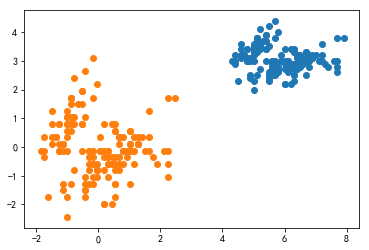

In [38]:
X = iris[['萼片长度', '萼片宽度']]

XM = (X - X.mean(0)) / X.std(0)

fig, ax = plt.subplots()
rect = plt.Rectangle((1,1), width=5, height=12)
ax.scatter(X['萼片长度'], X['萼片宽度'])
ax.scatter(XM['萼片长度'], XM['萼片宽度'])
plt.show()

In [44]:
X.std(0)

萼片长度    0.828066
萼片宽度    0.433594
dtype: float64

In [50]:
np.mean((np.linalg.norm(X - X.mean(0), axis=1)) ** 2)

0.8678728888888891

In [64]:
np.linalg.norm(X, axis=1)

array([6.6189123 , 7.56439026, 7.20902213, 5.60357029, 6.39061812,
       5.68594759, 7.15891053, 6.39765582, 7.38241153, 7.15122367,
       6.3007936 , 6.36003145, 6.44127317, 6.79779376, 5.79827561,
       6.04648658, 6.04648658, 6.35059052, 5.99082632, 7.87908624,
       6.6189123 , 7.15891053, 7.20069441, 6.04152299, 5.50090902,
       6.10327781, 5.96154342, 5.5470713 , 7.8       , 7.51531769,
       6.66108099, 5.93632883, 6.22414653, 6.35609943, 5.67978873,
       6.13269924, 6.39765582, 6.36003145, 6.70671305, 6.77790528,
       6.35295207, 6.79779376, 7.43236167, 7.85493475, 6.21691242,
       5.66038868, 7.70778827, 6.26498204, 6.46374504, 6.85054742,
       6.39531078, 6.26099034, 5.32541078, 7.11196175, 6.38122245,
       7.15891053, 7.56439026, 8.26377638, 6.71192968, 6.30634601,
       6.63098786, 6.94622199, 6.10327781, 6.07453702, 6.35295207,
       6.17737808, 6.44049688, 5.79827561, 5.84123275, 6.21288983,
       8.76641318, 8.12711511, 6.71192968, 6.51920241, 5.72013

In [65]:
import chardet

In [ ]:
chardet.detect()